# 4th Year Project: Filters and Feature Engineering Testground
`
Last Modified: 19th February 2020
Author: Ken Yew Piong, Chin Yang Tan
UCL ID: 16004444
`
```python
# DEVELOPER NOTES
prosuplvl0-forearm
22.4,28.56,49.7,57.65,78.5,88.9

prosuplvl0-wrist
22.5, 31.5, 52, 61.2, 81, 91.4

ttap-lvl0-wrist
24, 36, 56.5, 67.5, 88, 99

ttap-lvl1-wrist
19.5, 33.3, 52.5, 66, 90.5, 106

ttap-lvl2-wrist
21.7, 34, 52.8, 65.5, 83.6, 100.5

ttap-lvl3-wrist
24, 37.4, 56, 68.5, 87.1, 100

ttap-lvl4-wrist
22, 35, 53.5, 68, 87, 105

ftap-lvl0-wrist
36, 46, 67.5, 78.8, 95, 106.5
```

---
## Library Import

In [1]:
import os, math, import_ipynb, mpld3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.fftpack import fft
from scipy import signal
from util import *

%matplotlib inline
mpld3.enable_notebook()

importing Jupyter notebook from util.ipynb


---
## 1.0 Global Parameters for Plot Customisation

In [2]:
# Global Configuration Dictionary for Plot Customisation
# use pylab.rcParams.update(params) to update settings
params = {'lines.linewidth' : 1,
          'legend.fontsize': 24,
          'legend.loc': 'best',
          'figure.figsize': (17, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize': 24,
         'ytick.labelsize': 24}

# Update plot customisation parameters
pylab.rcParams.update(params)

---
## 2.0 Data Import

In [3]:
working_path = get_folder_path('ftap-wrist')
print(working_path)
os.chdir(working_path)
file = 'ftap-lvl0-wrist_S2_2019-12-05T09.44.38.283_C49948A1895C_Accelerometer_1.4.5.csv'
df = pd.read_csv(file)
os.chdir('..')

/Users/kenyew/Documents/Git/Parkinson-Disease-Repository-local/Patient001-2019-12-05/ftap-wrist


--- 
## 3.0 Filter Testground
### 3.1 Raw Data Overview

In [4]:
df

epoch (ms)            time (-00:00)  elapsed (s)  x-axis (g)  \
0     1.580000e+12  2019-12-05T09:44:38.283        0.000       0.356   
1     1.580000e+12  2019-12-05T09:44:38.304        0.021       0.358   
2     1.580000e+12  2019-12-05T09:44:38.323        0.040       0.380   
3     1.580000e+12  2019-12-05T09:44:38.343        0.060       0.400   
4     1.580000e+12  2019-12-05T09:44:38.362        0.079       0.384   
...            ...                      ...          ...         ...   
5829  1.580000e+12  2019-12-05T09:46:34.126      115.843       0.286   
5830  1.580000e+12  2019-12-05T09:46:34.147      115.864       0.285   
5831  1.580000e+12  2019-12-05T09:46:34.166      115.883       0.279   
5832  1.580000e+12  2019-12-05T09:46:34.186      115.903       0.283   
5833  1.580000e+12  2019-12-05T09:46:34.205      115.922       0.285   

      y-axis (g)  z-axis (g)  
0          0.152       0.875  
1          0.154       0.881  
2          0.163       0.873  
3          0.152       0.876  
4          0.151       0.876  
...          ...         ...  
5829       0.072       0.918  
5830       0.074       0.918  
5831       0.073       0.921  
5832       0.074       0.921  
5833       0.073       0.918  

[5834 rows x 6 columns]

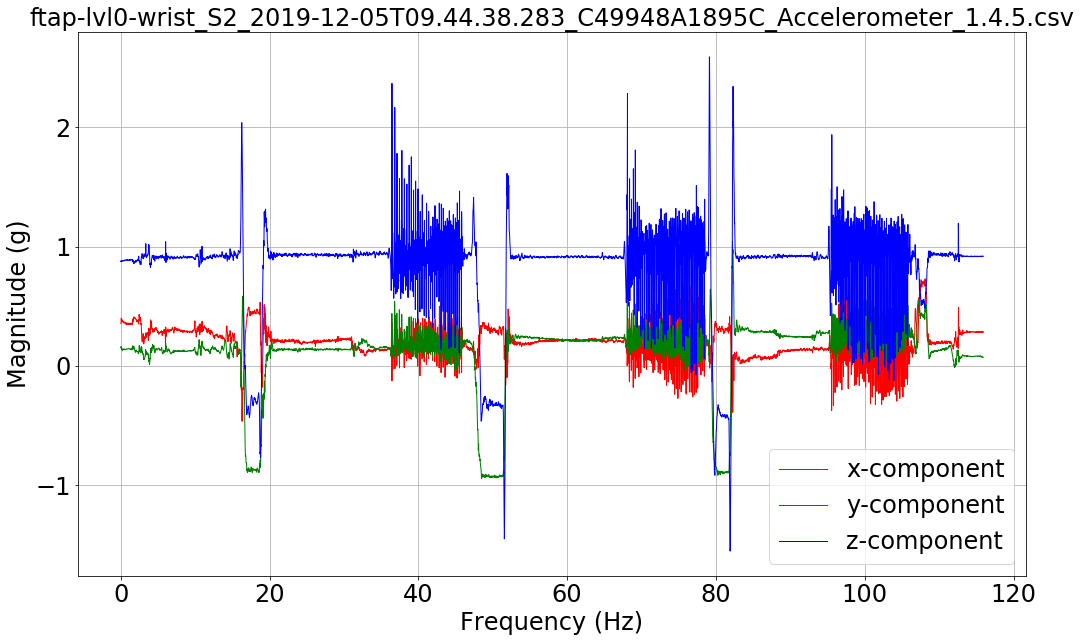

In [5]:
plot_time_3_axes(df, file, savefig=False)

frequency (Hz)  FFT magnitude x-axis  FFT magnitude y-axis  \
0           0.000000           1172.343000            699.247000   
1           0.008570            145.881541            254.918193   
2           0.017141            170.748540            112.285111   
3           0.025711             27.921540            303.670664   
4           0.034282             29.427594            407.851371   
...              ...                   ...                   ...   
2912       24.957148              1.638059              1.586661   
2913       24.965718              2.282731              0.245566   
2914       24.974289              1.928808              0.527337   
2915       24.982859              0.239911              1.527222   
2916       24.991430              2.555552              1.577716   

      FFT magnitude z-axis  
0              4817.885000  
1               153.143751  
2                51.835185  
3               323.778125  
4               482.629736  
...                    ...  
2912              1.408710  
2913              0.798641  
2914              0.936617  
2915              0.959020  
2916              1.371150  

[2917 rows x 4 columns]

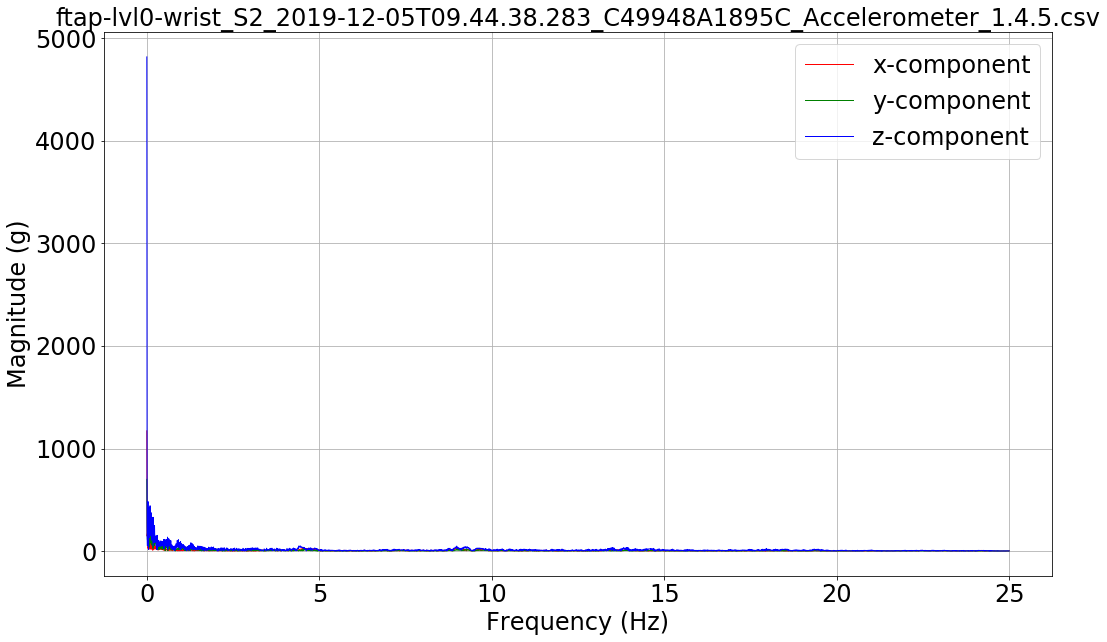

In [6]:
fs = 50
plot_frequency(df, fs, file, savefig=False) # 36, 46, 67.5, 78.8, 95, 106.5

---
### 3.2 Truncated Data Inspection

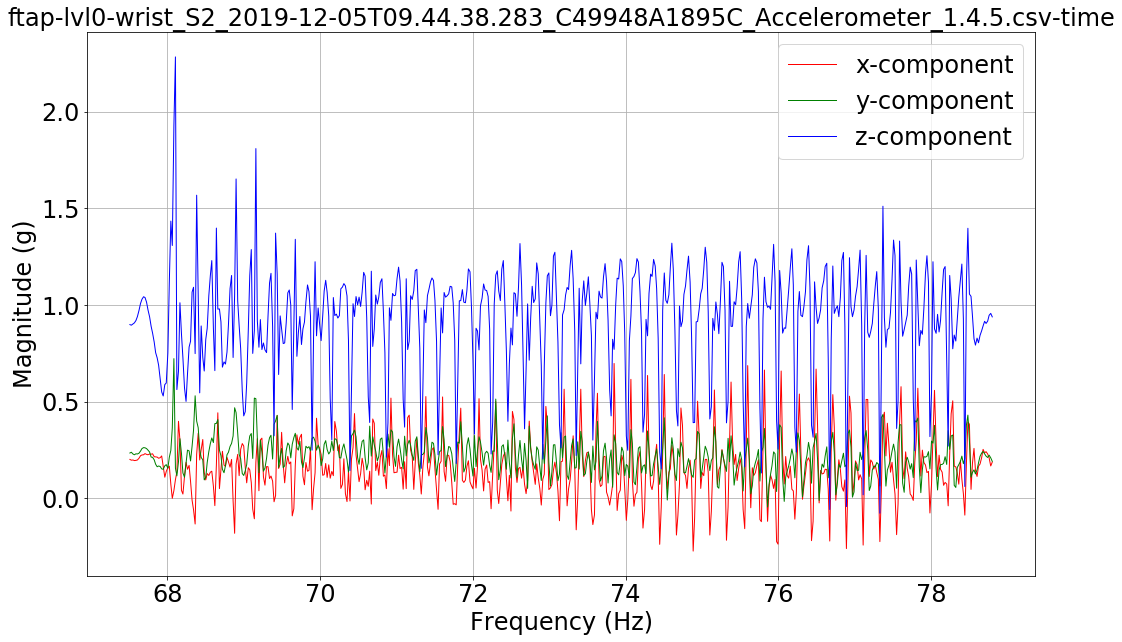

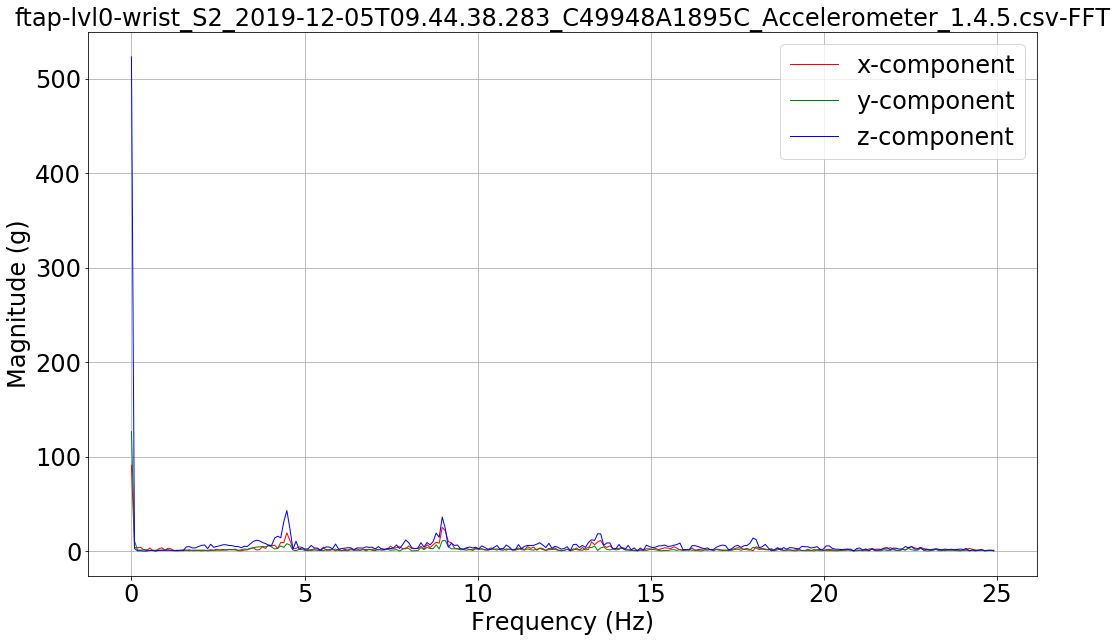

In [7]:
# ==============================================
# Truncated Data Analysis
# ==============================================
# Data Pre-processing
df_1, df_2, df_3 = truncate_dataframe(working_path, file, 36, 46, 67.5, 78.8, 95, 106.5)

# Data Visualization
fs = 50
plot_time_3_axes(df_2, file + "-time", savefig=True)
fft_df_2 = plot_frequency(df_2, fs, file + "-FFT", savefig=True)

In [8]:
df_2

epoch (ms)            time (-00:00)  elapsed (s)  x-axis (g)  \
3397  1.580000e+12  2019-12-05T09:45:45.795       67.512       0.202   
3398  1.580000e+12  2019-12-05T09:45:45.814       67.531       0.198   
3399  1.580000e+12  2019-12-05T09:45:45.835       67.552       0.199   
3400  1.580000e+12  2019-12-05T09:45:45.854       67.571       0.196   
3401  1.580000e+12  2019-12-05T09:45:45.874       67.591       0.197   
...            ...                      ...          ...         ...   
3961  1.580000e+12  2019-12-05T09:45:57.002       78.719       0.242   
3962  1.580000e+12  2019-12-05T09:45:57.023       78.740       0.230   
3963  1.580000e+12  2019-12-05T09:45:57.042       78.759       0.210   
3964  1.580000e+12  2019-12-05T09:45:57.063       78.780       0.168   
3965  1.580000e+12  2019-12-05T09:45:57.083       78.800       0.188   

      y-axis (g)  z-axis (g)  
3397       0.235       0.899  
3398       0.239       0.896  
3399       0.230       0.902  
3400       0.226       0.908  
3401       0.231       0.920  
...          ...         ...  
3961       0.219       0.905  
3962       0.212       0.917  
3963       0.224       0.947  
3964       0.210       0.957  
3965       0.192       0.939  

[569 rows x 6 columns]

---
### 3.3 Low Pass Filter

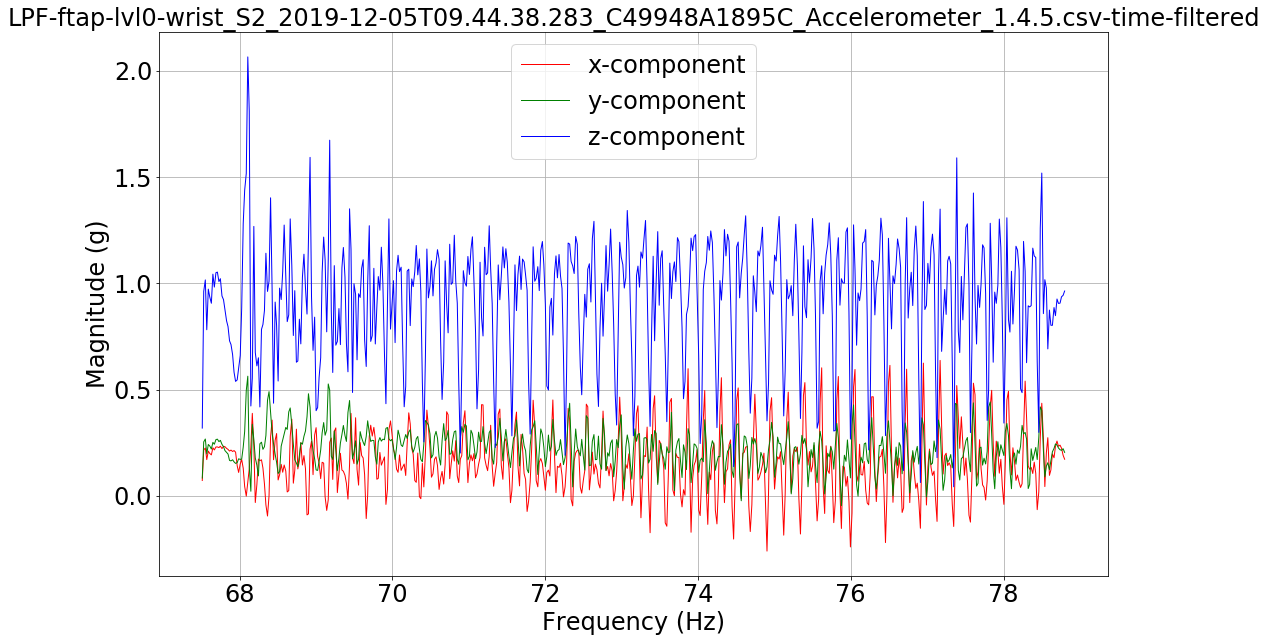

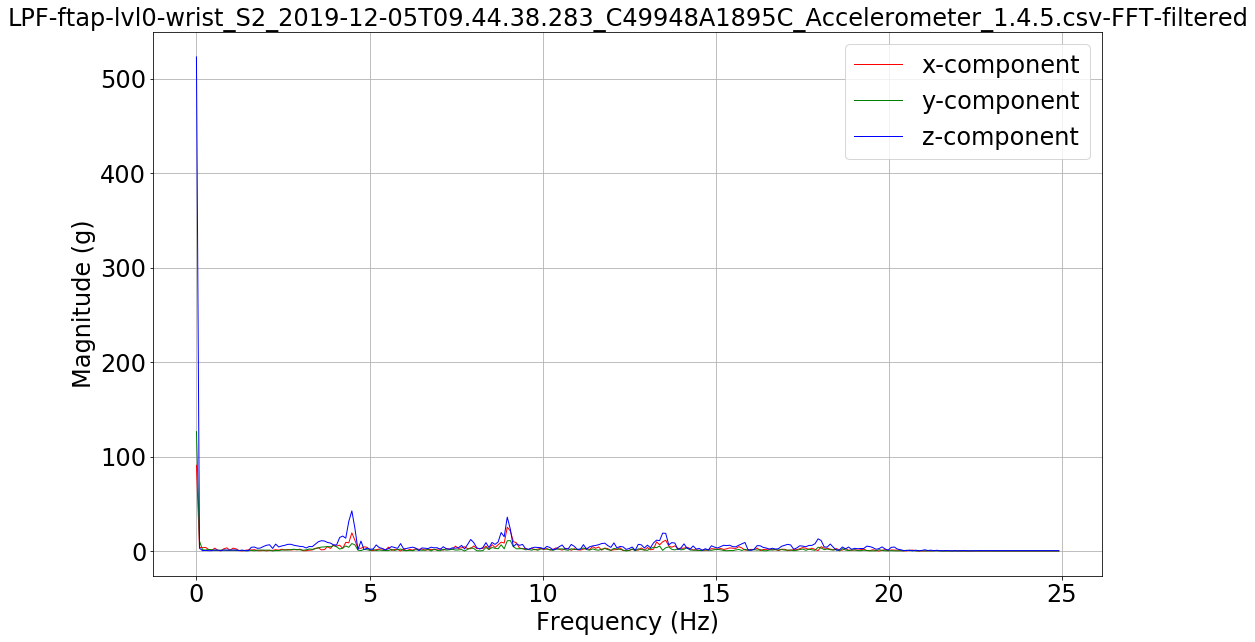

In [9]:
# ==============================================
# Input Parameters
# ==============================================
fs = 50 # Sampling Frequency
lowcut = 20 # Desired Cut-off Frequency (Hz)
order = 5 # Polynomial order of the Butterworth Filter

# ==============================================
# Filtered Signals - Data Pre-processing
# ==============================================
lpf_data = low_pass_filter(df_2, lowcut, fs, order, file) 

# ==============================================
# Filter Plots
# ==============================================
plot_time_3_axes(lpf_data, "LPF-" + file + "-time-filtered", savefig=False)
lpf_fft_df = plot_frequency(lpf_data, fs, "LPF-" + file + "-FFT-filtered", savefig=False)

In [10]:
lpf_data

epoch (ms)            time (-00:00)  elapsed (s)  x-axis (g)  \
3397  1.580000e+12  2019-12-05T09:45:45.795       67.512       0.202   
3398  1.580000e+12  2019-12-05T09:45:45.814       67.531       0.198   
3399  1.580000e+12  2019-12-05T09:45:45.835       67.552       0.199   
3400  1.580000e+12  2019-12-05T09:45:45.854       67.571       0.196   
3401  1.580000e+12  2019-12-05T09:45:45.874       67.591       0.197   
...            ...                      ...          ...         ...   
3961  1.580000e+12  2019-12-05T09:45:57.002       78.719       0.242   
3962  1.580000e+12  2019-12-05T09:45:57.023       78.740       0.230   
3963  1.580000e+12  2019-12-05T09:45:57.042       78.759       0.210   
3964  1.580000e+12  2019-12-05T09:45:57.063       78.780       0.168   
3965  1.580000e+12  2019-12-05T09:45:57.083       78.800       0.188   

      y-axis (g)  z-axis (g)  filtered x-axis (g)  filtered y-axis (g)  \
3397       0.235       0.899             0.071541             0.083229   
3398       0.239       0.896             0.214965             0.253148   
3399       0.230       0.902             0.224614             0.266978   
3400       0.226       0.908             0.169894             0.196372   
3401       0.231       0.920             0.210021             0.241117   
...          ...         ...                  ...                  ...   
3961       0.219       0.905             0.232623             0.224614   
3962       0.212       0.917             0.237901             0.216295   
3963       0.224       0.947             0.224194             0.213618   
3964       0.210       0.957             0.190533             0.221274   
3965       0.192       0.939             0.171576             0.203866   

      filtered z-axis (g)  
3397             0.318394  
3398             0.961944  
3399             1.016047  
3400             0.781372  
3401             0.972635  
...                   ...  
3961             0.905445  
3962             0.906566  
3963             0.936353  
3964             0.943373  
3965             0.963739  

[569 rows x 9 columns]

---
### 3.4 Highpass Filter

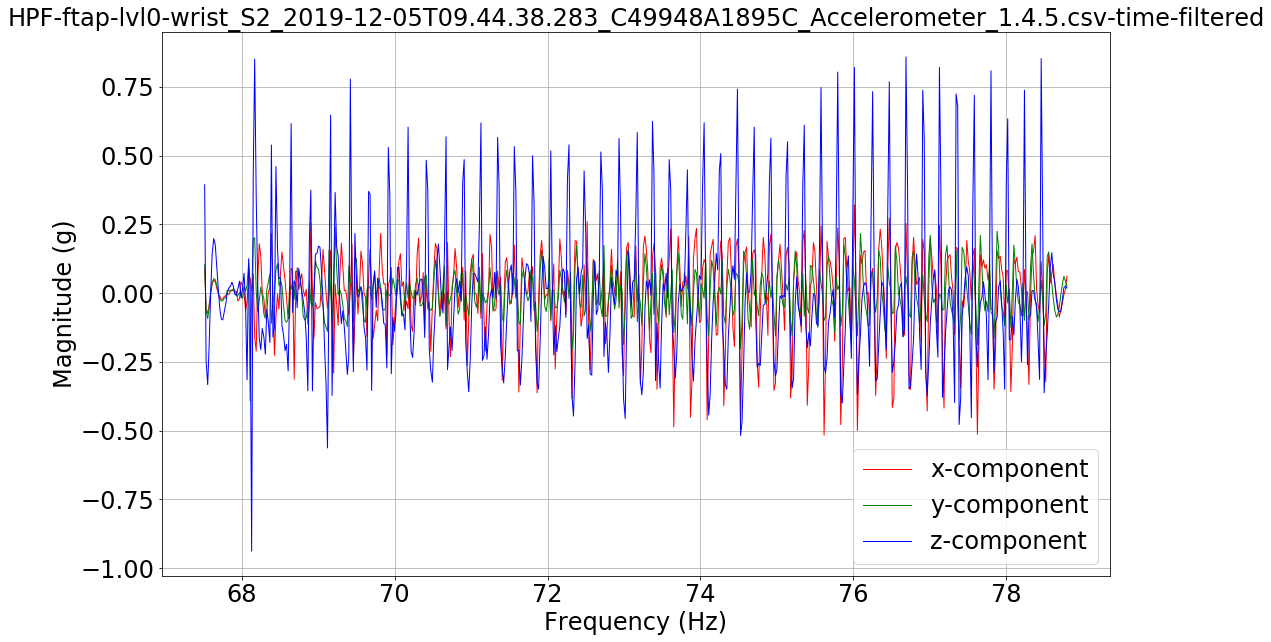

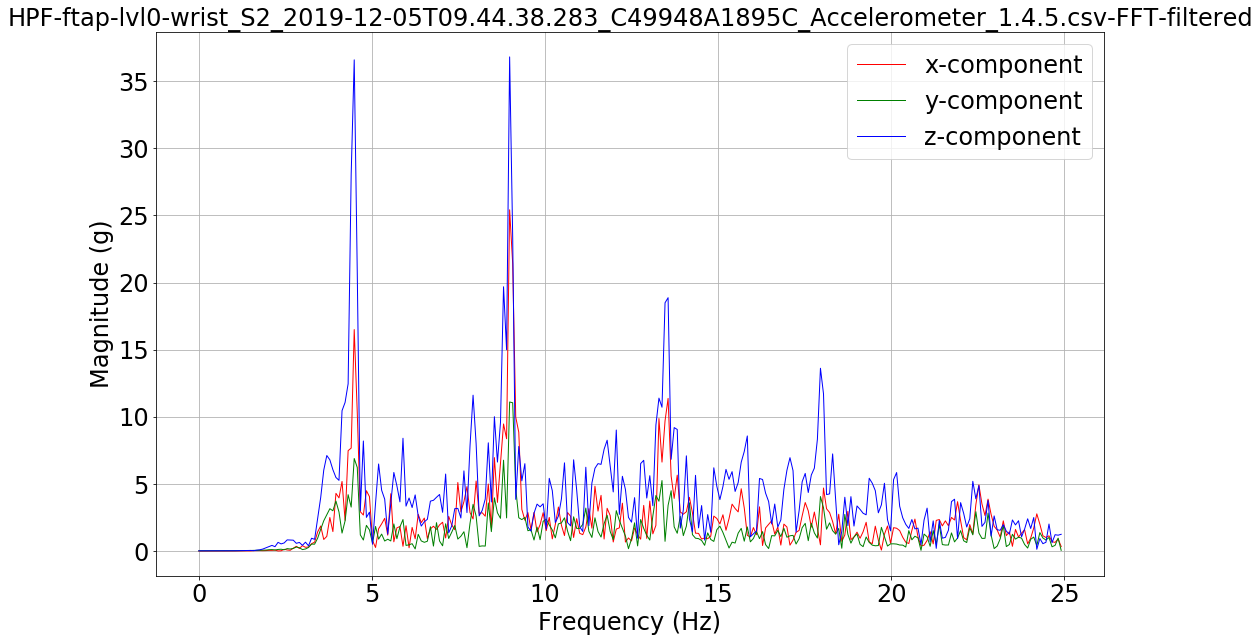

In [11]:
# ==============================================
# Input Parameters
# ==============================================
# Sample rate and desired cutoff frequencies (in Hz).
fs = 50
highcut = 4
order = 5

# ==============================================
# Filtered Signals - Data Pre-processing
# ==============================================
hpf_data = high_pass_filter(df_2, highcut, fs, order, file)

# ==============================================
# Filter Plots
# ==============================================
plot_time_3_axes(hpf_data, "HPF-" + file + "-time-filtered", savefig=False)
hpf_fft_df = plot_frequency(hpf_data, fs, "HPF-" + file + "-FFT-filtered", savefig=False)

In [12]:
hpf_data

epoch (ms)            time (-00:00)  elapsed (s)  x-axis (g)  \
3397  1.580000e+12  2019-12-05T09:45:45.795       67.512       0.202   
3398  1.580000e+12  2019-12-05T09:45:45.814       67.531       0.198   
3399  1.580000e+12  2019-12-05T09:45:45.835       67.552       0.199   
3400  1.580000e+12  2019-12-05T09:45:45.854       67.571       0.196   
3401  1.580000e+12  2019-12-05T09:45:45.874       67.591       0.197   
...            ...                      ...          ...         ...   
3961  1.580000e+12  2019-12-05T09:45:57.002       78.719       0.242   
3962  1.580000e+12  2019-12-05T09:45:57.023       78.740       0.230   
3963  1.580000e+12  2019-12-05T09:45:57.042       78.759       0.210   
3964  1.580000e+12  2019-12-05T09:45:57.063       78.780       0.168   
3965  1.580000e+12  2019-12-05T09:45:57.083       78.800       0.188   

      y-axis (g)  z-axis (g)  filtered x-axis (g)  filtered y-axis (g)  \
3397       0.235       0.899             0.088602             0.103076   
3398       0.239       0.896            -0.056864            -0.062358   
3399       0.230       0.902            -0.074035            -0.092948   
3400       0.226       0.908            -0.043127            -0.050860   
3401       0.231       0.920             0.001594             0.005635   
...          ...         ...                  ...                  ...   
3961       0.219       0.905            -0.059702            -0.005265   
3962       0.212       0.917            -0.034953             0.034487   
3963       0.224       0.947            -0.005085             0.061038   
3964       0.210       0.957             0.013330             0.043318   
3965       0.192       0.939             0.061784             0.027275   

      filtered z-axis (g)  
3397             0.394321  
3398            -0.246579  
3399            -0.332850  
3400            -0.189407  
3401             0.001395  
...                   ...  
3961            -0.067418  
3962            -0.021793  
3963             0.020109  
3964             0.026176  
3965             0.018647  

[569 rows x 9 columns]

---
### 3.5 Bandpass Filter

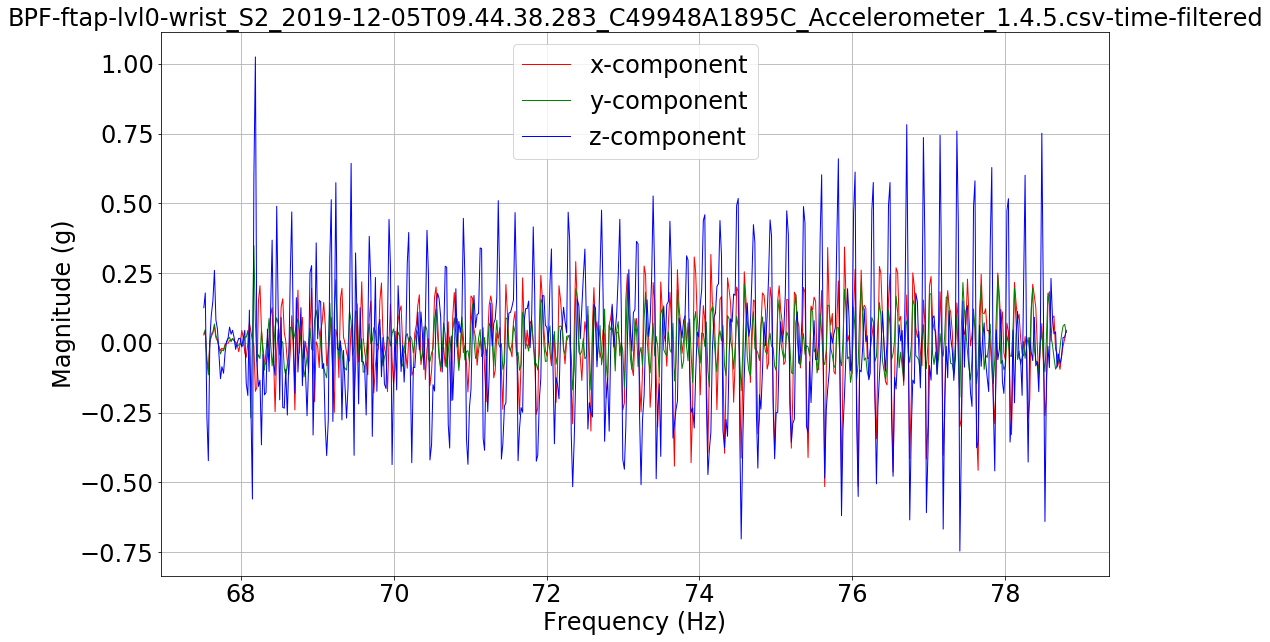

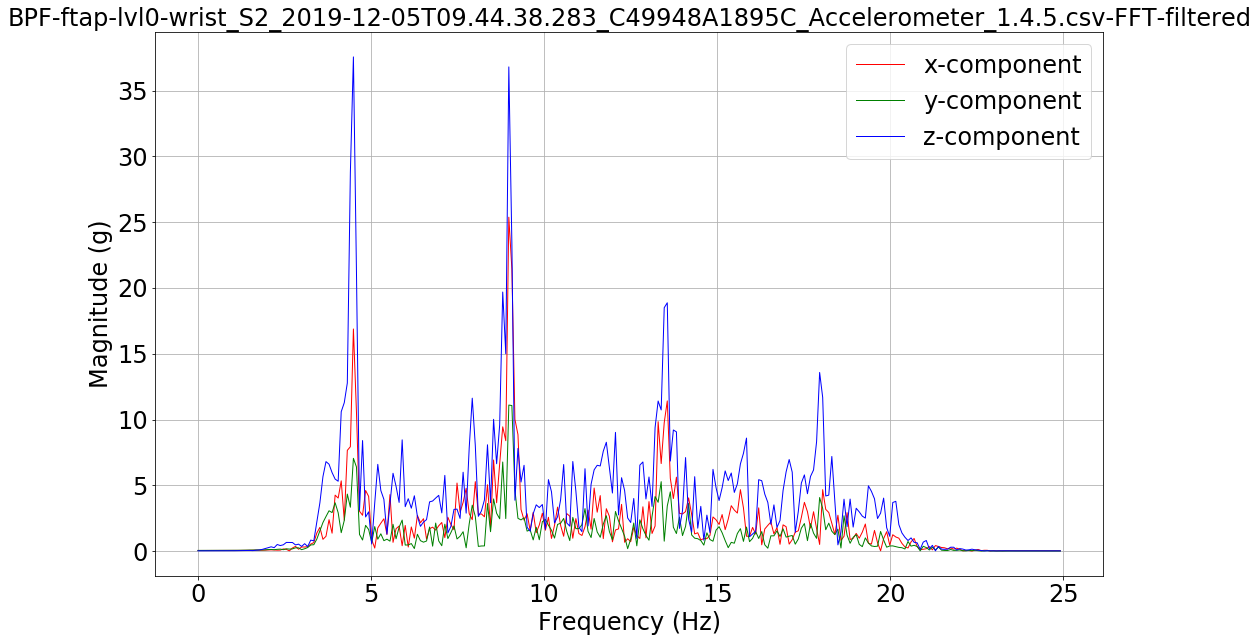

In [13]:
# ==============================================
# Input Parameters
# ==============================================
# Sample rate and desired cutoff frequencies (in Hz).
fs = 50
lowcut = 4
highcut = 20
order = 5

# ==============================================
# Filtered Signals - Data Pre-processing
# ==============================================
bpf_data = band_pass_filter(df_2, lowcut, highcut, fs, order, file)

# ==============================================
# Filter Plots
# ==============================================
plot_time_3_axes(bpf_data, "BPF-" + file + "-time-filtered", savefig=False)
bpf_fft_df = plot_frequency(bpf_data, fs, "BPF-" + file + "-FFT-filtered", savefig=False)

In [14]:
bpf_data

epoch (ms)            time (-00:00)  elapsed (s)  x-axis (g)  \
3397  1.580000e+12  2019-12-05T09:45:45.795       67.512       0.202   
3398  1.580000e+12  2019-12-05T09:45:45.814       67.531       0.198   
3399  1.580000e+12  2019-12-05T09:45:45.835       67.552       0.199   
3400  1.580000e+12  2019-12-05T09:45:45.854       67.571       0.196   
3401  1.580000e+12  2019-12-05T09:45:45.874       67.591       0.197   
...            ...                      ...          ...         ...   
3961  1.580000e+12  2019-12-05T09:45:57.002       78.719       0.242   
3962  1.580000e+12  2019-12-05T09:45:57.023       78.740       0.230   
3963  1.580000e+12  2019-12-05T09:45:57.042       78.759       0.210   
3964  1.580000e+12  2019-12-05T09:45:57.063       78.780       0.168   
3965  1.580000e+12  2019-12-05T09:45:57.083       78.800       0.188   

      y-axis (g)  z-axis (g)  filtered x-axis (g)  filtered y-axis (g)  \
3397       0.235       0.899             0.028337             0.032966   
3398       0.239       0.896             0.039794             0.047509   
3399       0.230       0.902            -0.060016            -0.069517   
3400       0.226       0.908            -0.094507            -0.114591   
3401       0.231       0.920             0.003913             0.003885   
...          ...         ...                  ...                  ...   
3961       0.219       0.905            -0.094723            -0.017431   
3962       0.212       0.917            -0.044480             0.031216   
3963       0.224       0.947            -0.010436             0.060195   
3964       0.210       0.957             0.014147             0.066597   
3965       0.192       0.939             0.045181             0.037323   

      filtered z-axis (g)  
3397             0.126112  
3398             0.179180  
3399            -0.263926  
3400            -0.421929  
3401             0.014888  
...                   ...  
3961            -0.076157  
3962            -0.048093  
3963             0.019165  
3964             0.020476  
3965             0.043287  

[569 rows x 9 columns]

---
## 4.0 Feature Engineering Testground

### 4.1 Filtered Data Inspection

In [15]:
hpf_data

epoch (ms)            time (-00:00)  elapsed (s)  x-axis (g)  \
3397  1.580000e+12  2019-12-05T09:45:45.795       67.512       0.202   
3398  1.580000e+12  2019-12-05T09:45:45.814       67.531       0.198   
3399  1.580000e+12  2019-12-05T09:45:45.835       67.552       0.199   
3400  1.580000e+12  2019-12-05T09:45:45.854       67.571       0.196   
3401  1.580000e+12  2019-12-05T09:45:45.874       67.591       0.197   
...            ...                      ...          ...         ...   
3961  1.580000e+12  2019-12-05T09:45:57.002       78.719       0.242   
3962  1.580000e+12  2019-12-05T09:45:57.023       78.740       0.230   
3963  1.580000e+12  2019-12-05T09:45:57.042       78.759       0.210   
3964  1.580000e+12  2019-12-05T09:45:57.063       78.780       0.168   
3965  1.580000e+12  2019-12-05T09:45:57.083       78.800       0.188   

      y-axis (g)  z-axis (g)  filtered x-axis (g)  filtered y-axis (g)  \
3397       0.235       0.899             0.088602             0.103076   
3398       0.239       0.896            -0.056864            -0.062358   
3399       0.230       0.902            -0.074035            -0.092948   
3400       0.226       0.908            -0.043127            -0.050860   
3401       0.231       0.920             0.001594             0.005635   
...          ...         ...                  ...                  ...   
3961       0.219       0.905            -0.059702            -0.005265   
3962       0.212       0.917            -0.034953             0.034487   
3963       0.224       0.947            -0.005085             0.061038   
3964       0.210       0.957             0.013330             0.043318   
3965       0.192       0.939             0.061784             0.027275   

      filtered z-axis (g)  
3397             0.394321  
3398            -0.246579  
3399            -0.332850  
3400            -0.189407  
3401             0.001395  
...                   ...  
3961            -0.067418  
3962            -0.021793  
3963             0.020109  
3964             0.026176  
3965             0.018647  

[569 rows x 9 columns]

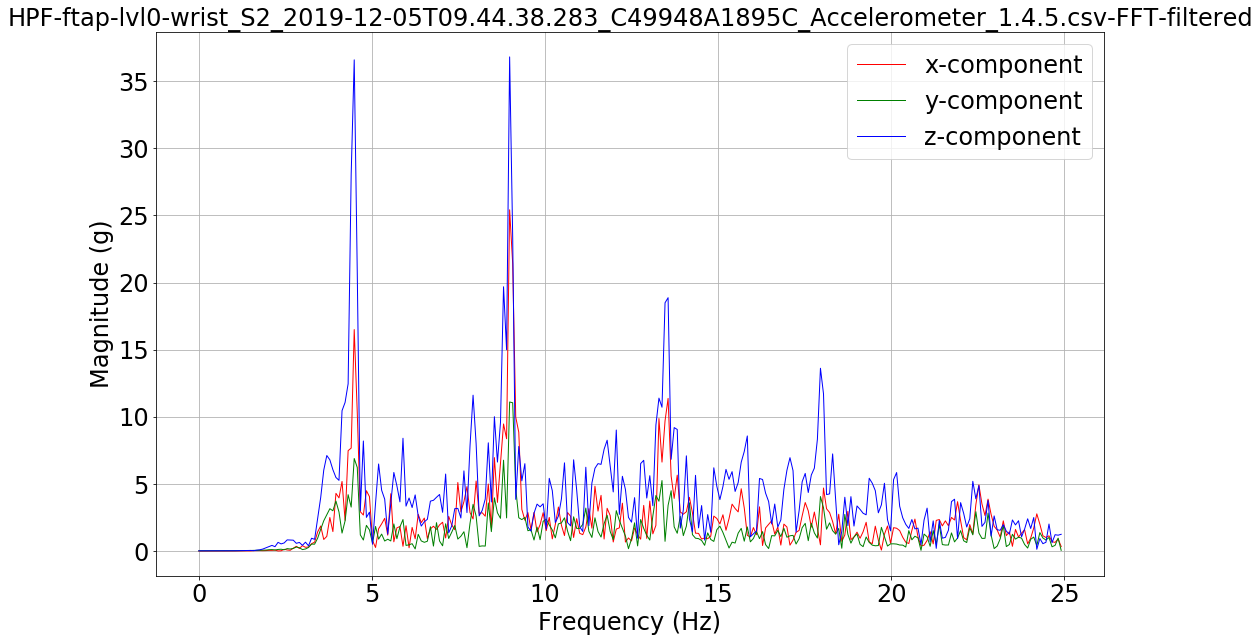

In [16]:
hpf_fft_df = plot_frequency(hpf_data, fs, "HPF-" + file + "-FFT-filtered", savefig=False)

---
## 4.1 Power Spectral Density

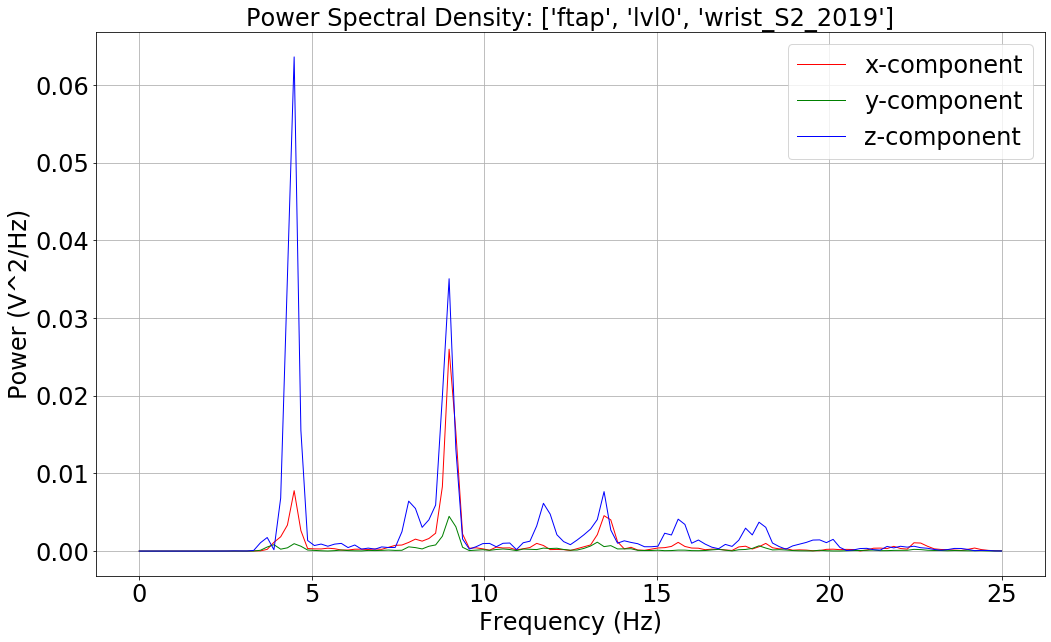

In [17]:
fs = 50
psd_df = plot_psd(hpf_data, fs, file, savefig=True)

In [18]:
psd_df

frequency (Hz)    psd x-axis    psd y-axis    psd z-axis
0          0.000000  2.216810e-06  1.103900e-06  3.074114e-06
1          0.195312  1.097131e-06  5.488899e-07  1.517047e-06
2          0.390625  1.521740e-11  2.182586e-12  3.967075e-11
3          0.585938  2.033186e-11  2.852152e-12  4.460616e-11
4          0.781250  1.399681e-10  3.127324e-12  5.706952e-11
..              ...           ...           ...           ...
124       24.218750  3.918295e-04  5.010783e-05  5.407339e-05
125       24.414062  1.935491e-04  5.168079e-05  8.931332e-05
126       24.609375  9.406618e-05  2.315058e-05  7.804619e-05
127       24.804688  4.306546e-05  2.128356e-05  2.051177e-05
128       25.000000  3.646889e-05  1.583250e-05  1.059811e-05

[129 rows x 4 columns]

In [19]:
hpf_fft_df

frequency (Hz)  FFT magnitude x-axis  FFT magnitude y-axis  \
0          0.000000              0.016099              0.039033   
1          0.088028              0.016163              0.039073   
2          0.176056              0.016353              0.039193   
3          0.264085              0.016664              0.039399   
4          0.352113              0.017085              0.039690   
..              ...                   ...                   ...   
279       24.559859              1.151256              1.030488   
280       24.647887              0.719710              0.336536   
281       24.735915              0.663041              0.443070   
282       24.823944              0.925286              0.982017   
283       24.911972              0.351452              0.070977   

     FFT magnitude z-axis  
0                0.035713  
1                0.035770  
2                0.035937  
3                0.036202  
4                0.036549  
..                    ...  
279              2.031776  
280              0.645628  
281              1.235403  
282              1.200138  
283              1.266382  

[284 rows x 4 columns]

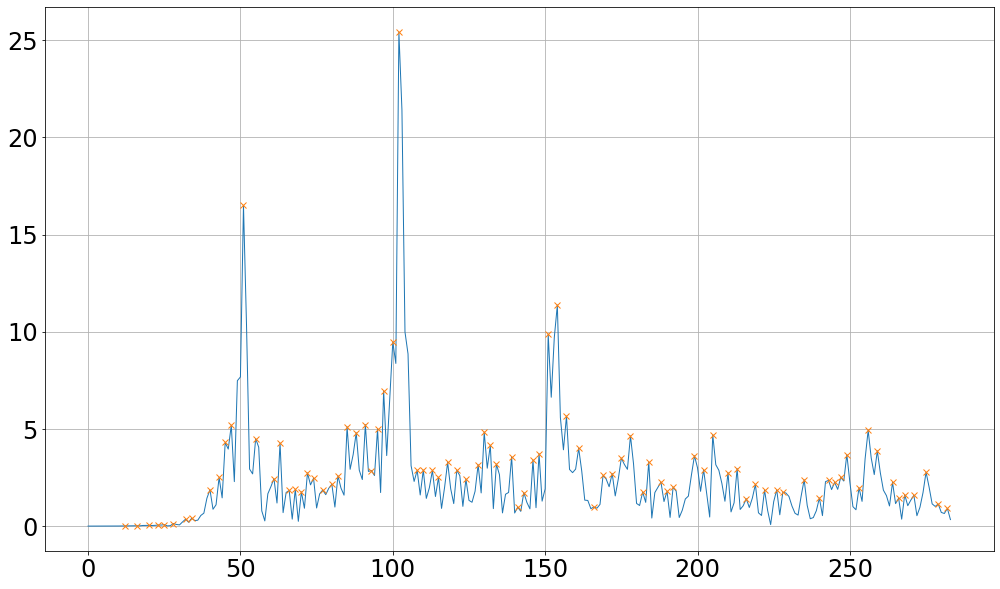

In [20]:
# data = psd_df['psd x-axis']
data = hpf_fft_df['FFT magnitude x-axis']
peaks, _ = signal.find_peaks(data)
prominences = signal.peak_prominences(data, peaks)[0]
plt.plot(data)
plt.plot(peaks, data[peaks], 'x')
plt.grid()

---
## 5.0 Archive Code

In [21]:
#     # Save Plots
#     cnt = 0
#     while os.path.exists('{}{:d}.png'.format(t, cnt)):
#         cnt += 1
#     plt.savefig('{}{:d}.png'.format(t, cnt))

# Plot time function presets
df_column_mapping = {
    'x' : 3,
    'y' : 4,
    'z' : 5
}
axis_listing = ['x', 'y', 'z']

def plot_time(df, var = 'x', t = ''):
    # Check that var is 'x', 'y', or 'z'
    # Defaults to 'x' if not used
    if var not in axis_listing:
        var = 'x'
    
    # Get data
    time = df.iloc[:, 2]
    data = df.iloc[:, df_column_mapping[var]]
    
    # Initialize figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Label axes
    ax.set(xlabel = df.columns[2], ylabel = df.columns[df_column_mapping[var]], title = t) 
    # Customize the major grid
    ax.grid(b=True, which='both')
    
    # Plot
    ax.plot(time, data)
    
def low_pass_filter_variable(df, f_size, cutoff, fs, window, file):
    """
    :FUNCTION: Appends input dataframe with new filtered x,y,z values 
    processed with a low pass filter
    :df: Pandas dataframe of raw acc/gyro data
    :f_size: Number of FIR taps (Use 155 as default)
    :cutoff: Desired cut-off frequency
    :fs: Sampling frequency
    :window: Window function of filter (e.g.: Hamming, Hanning)
    :file: CSV file being worked on
    :return: Processed Pandas dataframe with new filtered x,y,z values appended
    """
    processed_df = df.copy()
    select_cols = processed_df.columns[-3:]
    if 'Accelerometer' in file: 
        col_name = ['filtered x-axis (g)', 'filtered y-axis (g)', 'filtered z-axis (g)']
    elif 'Gyroscope' in file: 
        col_name = ['filtered x-axis (deg/s)', 'filtered y-axis (deg/s)', 'filtered z-axis (deg/s)']
    
    lpf=signal.firwin(f_size, cutoff/fs, window=window)
    for idx, col in enumerate(select_cols):
        processed_df[col_name[idx]] = pd.DataFrame(signal.convolve(processed_df.loc[:, col], lpf, mode='same')).values
    
    return processed_df

def median_filter(df, f_size, file):
    """
    :FUNCTION: Appends input dataframe with new filtered x,y,z values 
    processed with a median filter of choice
    :df: Pandas dataframe of raw acc/gyro data
    :f_size: Number of FIR taps (Use 155 as default)
    :file: CSV file being worked on
    :return: Processed Pandas dataframe with new filtered x,y,z values appended
    """
    processed_df = df.copy()
    select_cols = processed_df.columns[-3:]
    if 'Accelerometer' in file: 
        col_name = ['filtered x-axis (g)', 'filtered y-axis (g)', 'filtered z-axis (g)']
    elif 'Gyroscope' in file: 
        col_name = ['filtered x-axis (deg/s)', 'filtered y-axis (deg/s)', 'filtered z-axis (deg/s)']
    
    for idx, col in enumerate(select_cols):
        processed_df[col_name[idx]] = pd.DataFrame(signal.medfilt(processed_df.loc[:, col], f_size)).values
    
    return processed_df

# ==============================================
# Filter Functions Archive
# ==============================================
def median_filter(df, f_size):
    select_cols=[3, 4, 5]
    lgth, num_signal=df.shape
    f_data=np.zeros([lgth, num_signal])
    for idx, col in enumerate(select_cols):
        f_data[:,idx]=signal.medfilt(df.iloc[:,col], f_size)
    return f_data

def freq_filter(df, f_size, cutoff):
    select_cols=[3, 4, 5]
    lgth, num_signal=df.shape
    f_data=np.zeros([lgth, num_signal])
    lpf=signal.firwin(f_size, cutoff, window='hamming')
    for idx, col in enumerate(select_cols): 
        f_data[:,idx]=signal.convolve(df.iloc[:,col], lpf, mode='same')
    return f_data

def freq_filter_recursive(df, f_size, cutoff):
    lgth, num_signal=df.shape
    f_data=np.zeros([lgth, num_signal])
    lpf=signal.firwin(f_size, cutoff, window='hamming')
    for i in range(num_signal):
        f_data[:,i]=signal.convolve(df[:,i], lpf, mode='same')
    return f_data

def plot_frequency_recursive(df, fs, t = ''):
    # Create mapping lists
    labels=['x','y','z']
    color_map=['r', 'g', 'b']
    
    lgth, num_signal=df.shape
    fqy = np.zeros([lgth, num_signal])
    
    # Perform FFT on data and store in matrix
    for i in range(num_signal): 
        fqy[:,i] = np.abs(fft(df[:, i]))

    index = np.arange(int(lgth/2))/(int(lgth/2)/(fs/2))
    
    # Customise plots
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if 'Accelerometer' in t:
        ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Acceleration (g)', title = t) # xlim = [0, fs/2] 
    elif 'Gyroscope' in t:
        ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Acceleration (deg/s)', title = t) # xlim = [0, fs/2] 
    ax.grid(b=True, which='both')
    
    # Plot 
    for i in range(3):
        ax.plot(index, fqy[0:int(lgth/2),i], color_map[i], label=labels[i])

    ax.legend()

In [22]:
"""
# ======================================================================
# Edit the input variable below to change to the folder path of interest
# ======================================================================
working_path = get_folder_path('tota-calf&heel')

# Data Overview
display(working_path)
df_tabulated_stats = tabulate_all_stats(working_path, 4, 3, 30)
# display(df_tabulated_stats)

# File and directory management
os.chdir(working_path)
directory = os.listdir()

for file in directory:
    display(file)
    df = read_csv_file(file)
    if df is None:
        continue

    # ==============================================
    # Data Pre-processing
    # ==============================================
    df_raw_stats = pd.DataFrame(collect_stats_from_unprocessed_data(df, file, 4))
    display(df_raw_stats)
    
#     df_processed = process_dataframe(df, file, window, max_window) 
#     df_processed_stats = pd.DataFrame(collect_stats_from_processed_data(df_processed, file, 4))
#     display(df_processed_stats)
    
    # ==============================================
    # Data Visualisation
    # ==============================================
    # Update plot customisation parameters
    pylab.rcParams.update(params)
    
    # Uncomment sections below to enable plots of interest
    plot_time_3_axes(df, t = file)
#     plot_magnitude_frequency(df_processed, t = file)
#     plot_frequency(df, fs, t = file)

os.chdir('..')
"""

"\n# ======================================================================\n# Edit the input variable below to change to the folder path of interest\n# ======================================================================\nworking_path = get_folder_path('tota-calf&heel')\n\n# Data Overview\ndisplay(working_path)\ndf_tabulated_stats = tabulate_all_stats(working_path, 4, 3, 30)\n# display(df_tabulated_stats)\n\n# File and directory management\nos.chdir(working_path)\ndirectory = os.listdir()\n\nfor file in directory:\n    display(file)\n    df = read_csv_file(file)\n    if df is None:\n        continue\n\n    # ==============================================\n    # Data Pre-processing\n    # ==============================================\n    df_raw_stats = pd.DataFrame(collect_stats_from_unprocessed_data(df, file, 4))\n    display(df_raw_stats)\n    \n#     df_processed = process_dataframe(df, file, window, max_window) \n#     df_processed_stats = pd.DataFrame(collect_stats_from_proces